In [1]:
import sys
#print(sys.version)

import matplotlib.pyplot as plt
#%matplotlib inline
#%config BackendInline.figure_format='svg'

plt.style.use(['seaborn-paper', 'seaborn-white', 'seaborn-ticks'])
#plt.matplotlib.rcParams['figure.dpi'] = 120
#plt.matplotlib.rcParams['savefig.dpi'] = 120

import numpy as np
import pandas as pd

#import mlgrad.model as model
import mlgrad.func as func
import mlgrad.distance as distance
#import mlgrad.regular as regular
#import mlgrad.loss as loss
import mlgrad.weights as weights
import mlgrad.averager as averager
import mlgrad.kmeans as kmeans

from mlgrad import averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, drisk

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape, digits.data.flags)

Y = digits.target
X = np.ascontiguousarray(digits.data)

(1797, 64)   C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [42]:
hcd_sq = kmeans.HCD(func.Id(), X, 10)
hcd_sq.fit()
hcd_sq.K

18

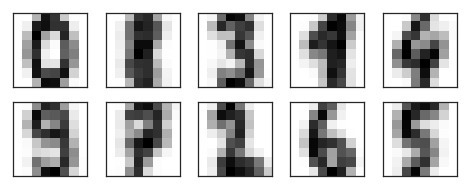

In [45]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = hcd_sq.params.base.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [46]:
from scipy.stats import mode

hcd_sq_labels = np.zeros_like(hcd_sq.Y.base)
for i in range(10):
    mask = (hcd_sq.Y.base == i)
    hcd_sq_labels[mask] = mode(Y[mask])[0]

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, hcd_sq_labels)

0.7907623817473567

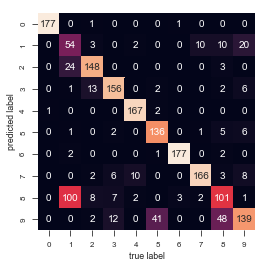

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(Y, hcd_sq_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [29]:
avrfunc = averager_it(func.QuantileFunc(0.5, func.Sqrt()))
hcd_rob = kmeans.HCD_M1(avrfunc, X, 10)
hcd_rob.fit()
hcd_rob.K

101

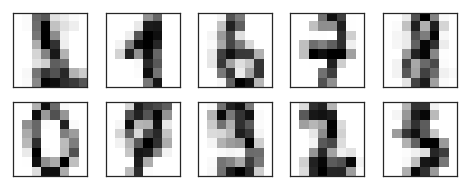

In [30]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = hcd_rob.params.base.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [31]:
from scipy.stats import mode

hcd_rob_labels = np.zeros_like(hcd_rob.Y.base)
for i in range(10):
    mask = (hcd_rob.Y.base == i)
    hcd_rob_labels[mask] = mode(Y[mask])[0]


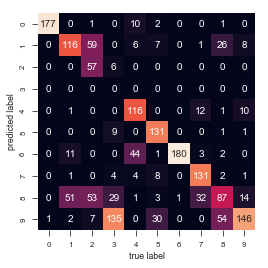

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(Y, hcd_rob_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()